# **Project:**
# **Covid 19 Detection X-Ray Image Classification**

Team Member:
1. Padam Bahadur Regmi
2. Shreebatsa Aryal
3. Bikesh Prajapati
4. Hemanta Rijal
5. Rosy Shrestha

## **Project Summary:**
For this project we, take Covid 19 almost 8500 covid-19 X Ray images and divided the images in train, test and validation set.

We apply Vgg16 model to classify the covid-19 and normal image. But we could not able to obtain the targeted accuracy of the model so, we used another popular model Resnet50 which helps to obtain the targeted accuracy of the model.

Also, we used the GRAD CAM method to visualize the probable spots effected in the lungs by covid 19 in the X-Ray Image.



In [3]:
# Important libraries for accessing the dataset

import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **Loading data from google Drive to the google colab monting the google colab with the drive.**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Metadata Information**

In [5]:
covid_imgs = pd.read_excel("/content/drive/MyDrive/final_images_model/COVID.metadata.xlsx")
covid_imgs.head(5)

FILE NAME FORMAT     SIZE                                                URL
0   COVID-1    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
1   COVID-2    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
2   COVID-3    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
3   COVID-4    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
4   COVID-5    PNG  256*256  https://sirm.org/category/senza-categoria/covi...

In [6]:
Normal_images = pd.read_excel("/content/drive/MyDrive/final_images_model/Normal.metadata.xlsx")
Normal_images.head(2)

FILE NAME FORMAT     SIZE                                                URL
0  NORMAL-1    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
1  NORMAL-2    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...

In [7]:
#Getting total number of Images in the dataset

In [8]:
ROOT_DIR = "/content/drive/MyDrive/Covid X Ray Data"
imgs = ['COVID','Normal']

NEW_DIR = "/content/drive/MyDrive/All_images"

In [9]:
import fnmatch
type = ['COVID','Normal']
counter =[]
for x in type:
  dir_path = f'/content/drive/MyDrive/Covid X Ray Data/{x}/images'
  count = len(fnmatch.filter(os.listdir(dir_path), '*.*'))
  counter.append(count)
  print(x, 'Images:', count)

COVID Images: 2929
Normal Images: 6893


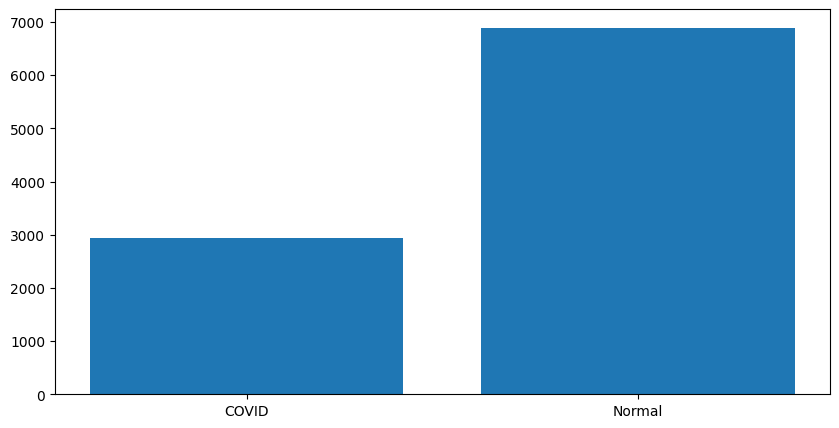

In [10]:
plt.figure(figsize=(10,5))
plt.bar(x = type, height= counter)
plt.show()

Performed this step to create the train test and valdation split randomly in jupyter notebook as it takes alot of time in google colab due to cloud environmet and uploaded the images into the google drive.

In [11]:
"""#Creating the folder

if not os.path.exists(NEW_DIR+"train_test_split/"):


  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 2822 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 4000 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

    # Validation Data
  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)"""


'#Creating the folder\n\nif not os.path.exists(NEW_DIR+"train_test_split/"):\n\n\n  os.makedirs(NEW_DIR+"train_test_split/")\n\n  os.makedirs(NEW_DIR+"train_test_split/train/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/train/Covid")\n\n  os.makedirs(NEW_DIR+"train_test_split/test/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/test/Covid")\n\n  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")\n  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")\n\n\n  # Train Data\n  for i in np.random.choice(replace= False , size= 2822 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):\n    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )\n    os.remove(i)\n\n  for i in np.random.choice(replace= False , size= 4000 , a = glob.glob(ROOT_DIR+imgs[2]+"/images/*") ):\n    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )\n    os.remove(i)\n\n    # Validation Data\n  for i in np.random.choice(replace= False , size= 400 , a = glob.glob(ROOT_DIR+imgs[0]+"/images/*") ):\n  

In [12]:
train_path  = "/content/drive/MyDrive/final_images_model/train"
valid_path  = "/content/drive/MyDrive/final_images_model/validation"
test_path   = "/content/drive/MyDrive/final_images_model/test"

**Counting the number of Images in each directory:**

In [13]:
import os
def count_images_in_directory(directory_path, class_names):
    total_counts = {class_name: 0 for class_name in class_names}

    for class_name in class_names:
        class_path = os.path.join(directory_path, class_name)

        if os.path.isdir(class_path):
            image_count = sum(1 for _ in filter(lambda x: x.lower().endswith(('.png')), os.listdir(class_path)))
            total_counts[class_name] = image_count
    return total_counts

# Specify the root directory paths
train_dir = "/content/drive/MyDrive/final_images_model/train"
test_dir = "/content/drive/MyDrive/final_images_model/test"
validation_dir = "/content/drive/MyDrive/final_images_model/validation"

# Specify the class names
class_names = ["COVID", "Normal"]

# Count images in each directory
train_counts = count_images_in_directory(train_dir, class_names)
test_counts = count_images_in_directory(test_dir, class_names)
validation_counts = count_images_in_directory(validation_dir, class_names)

# Print the counts
print("Train Directory:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")
print()

print("Test Directory:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count} images")
print()

print("Validation Directory:")
for class_name, count in validation_counts.items():
    print(f"{class_name}: {count} images")

Train Directory:
COVID: 2822 images
Normal: 4000 images

Test Directory:
COVID: 400 images
Normal: 400 images

Validation Directory:
COVID: 400 images
Normal: 400 images


# Building the model:

## **MODEL 1: VGG16**

# **Image Preprocessing:**

In this step we preprocess the image using ImageDataGenerator of the keras library forby performaing data augmentation and convert each images in the dataset from each directory.

ImageDataGenerator is used for data augmentation and here we are using the data augmentation technique as preprocessing function as vgg16.preprocess_input which is used to preprocess the image that aligns with the preprocessing used during the training of  vgg16 model

In [14]:
#importing necessary keras libraried for image preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras


In [15]:

train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))


Found 6822 images belonging to 2 classes.


In [16]:


validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 800 images belonging to 2 classes.


In [17]:

test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
test= test_data_gen.flow_from_directory(directory= test_path , target_size=(224,224))


Found 800 images belonging to 2 classes.


# Plotting the images after preprocessing is performed

In [18]:
# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}

In [19]:
# to visualize the images in the traing data generator as next returns the next images train

t_img , label = train.next()

In [20]:
# Function to plot the images from above t_img and its label

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

## **Plot the Images:**

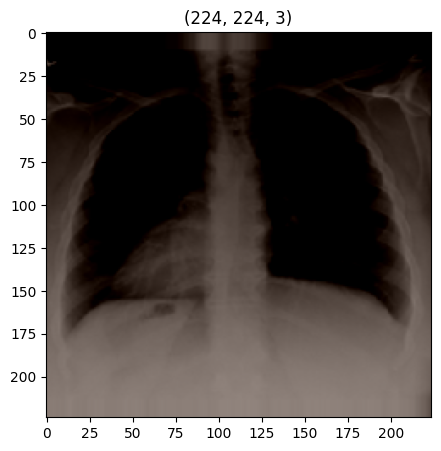

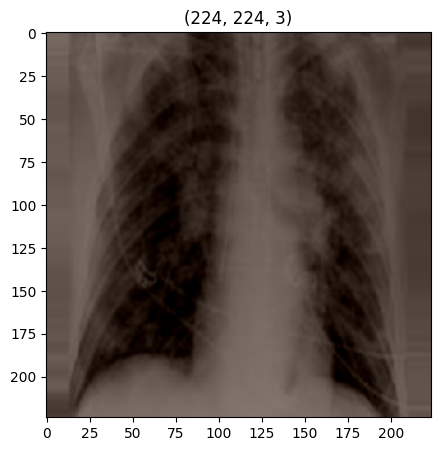

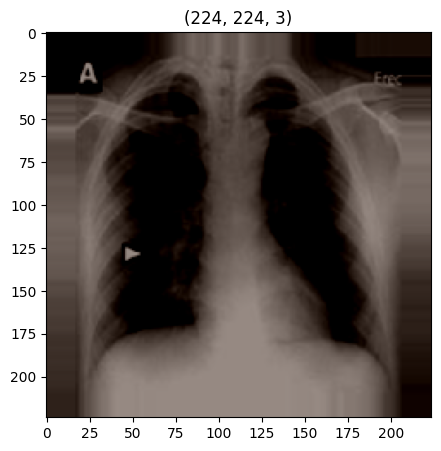

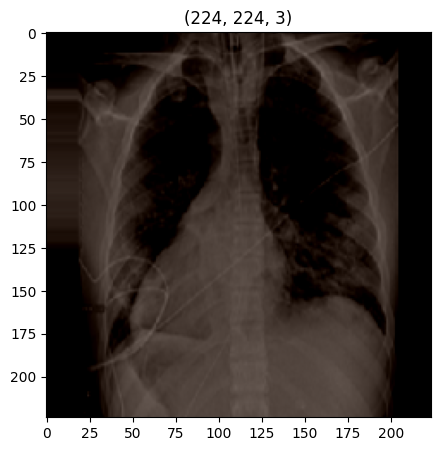

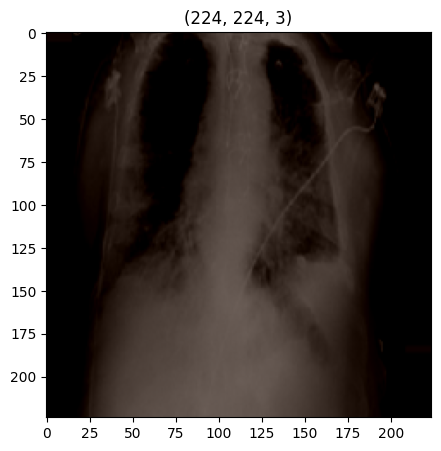

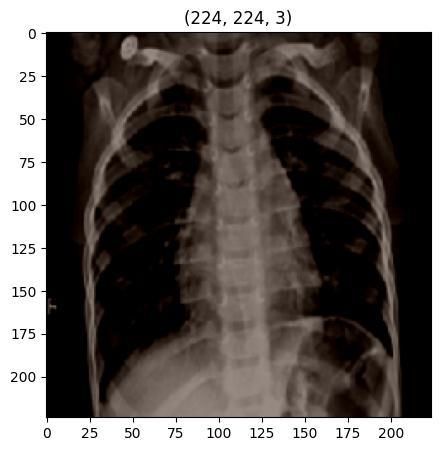

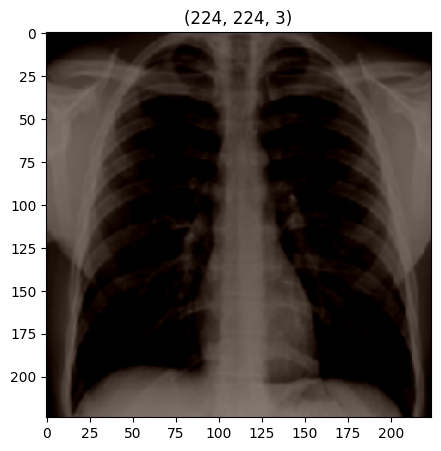

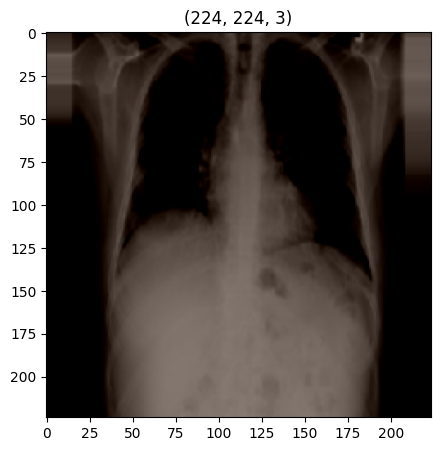

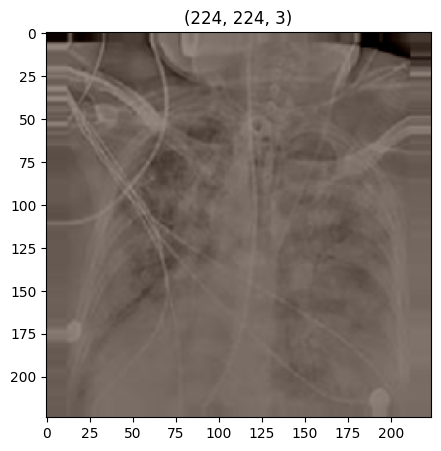

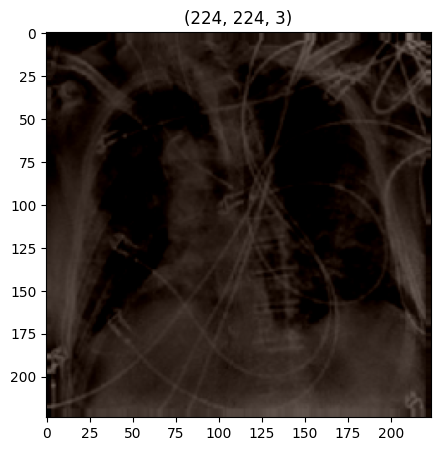

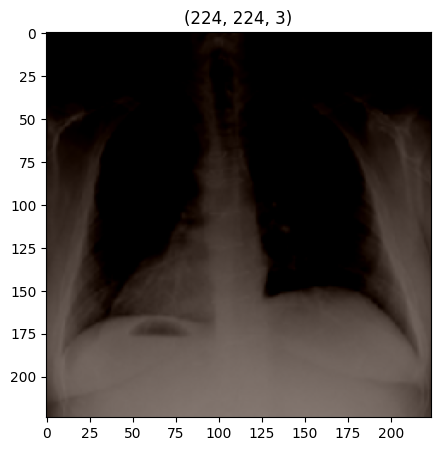

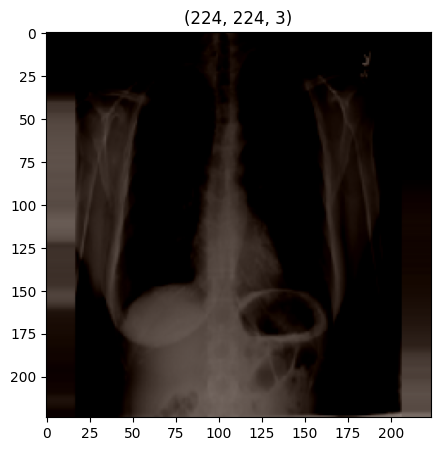

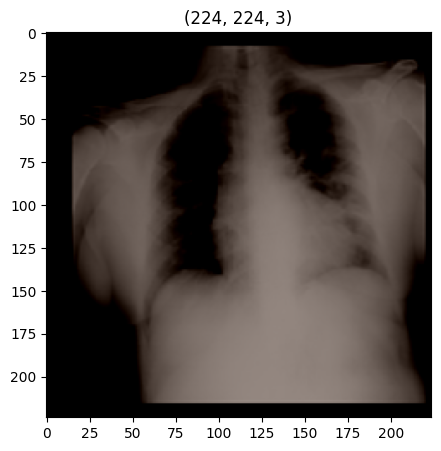

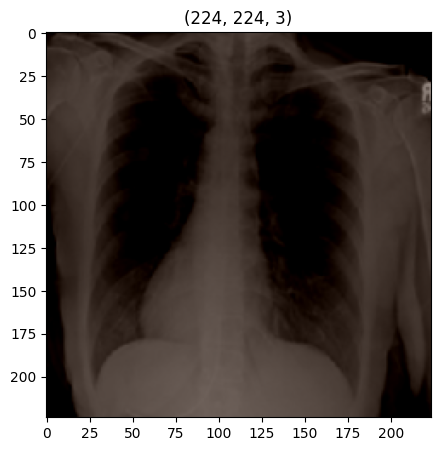

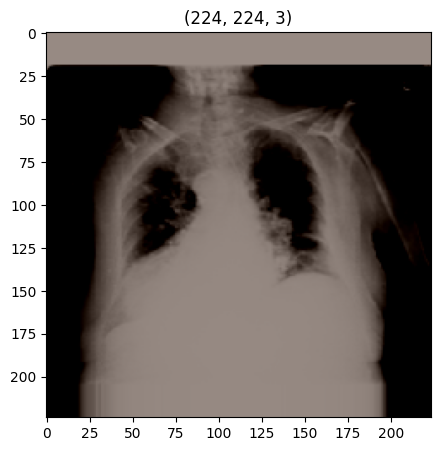

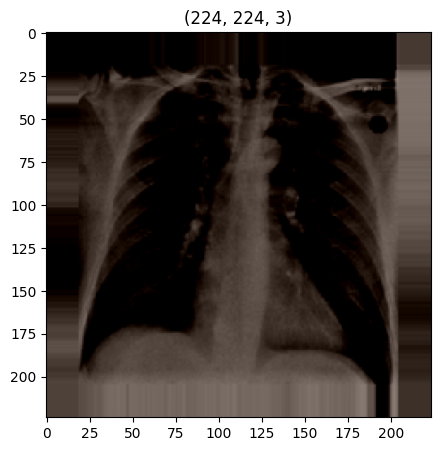

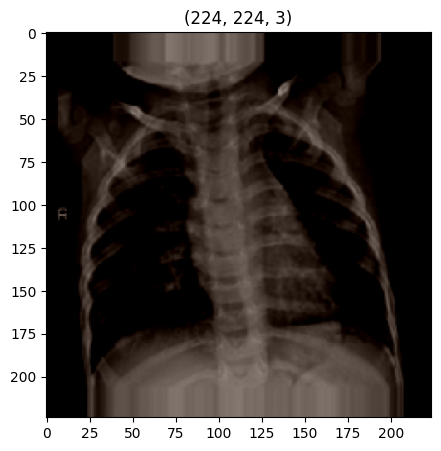

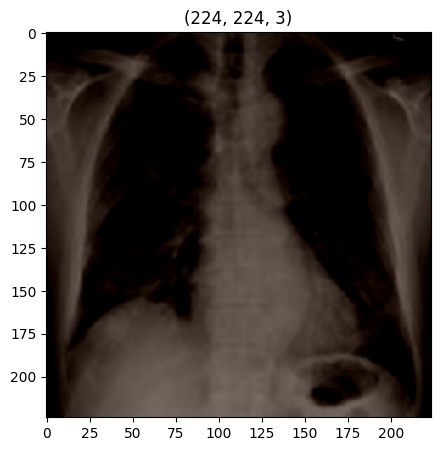

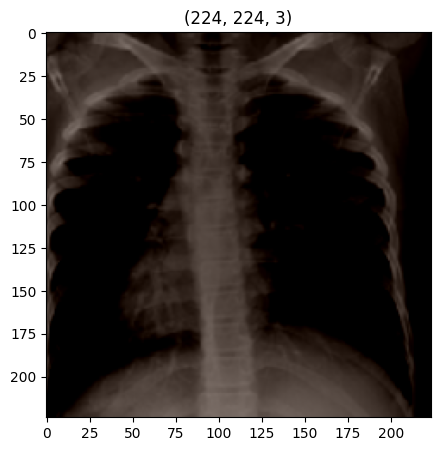

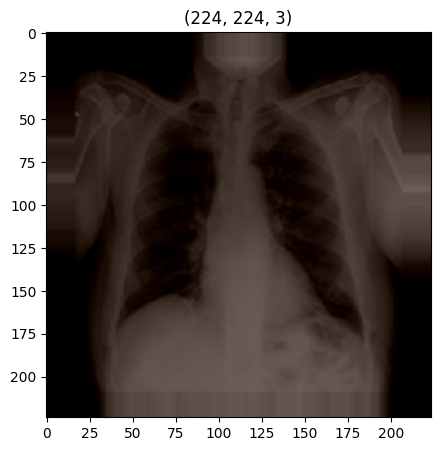

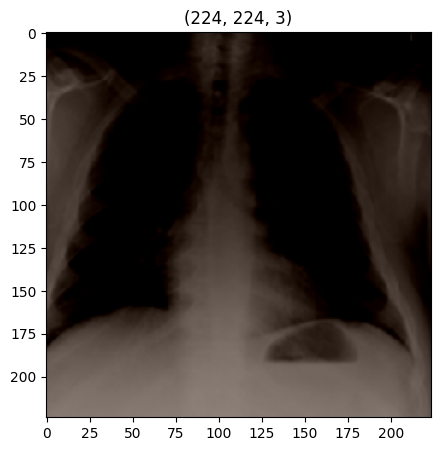

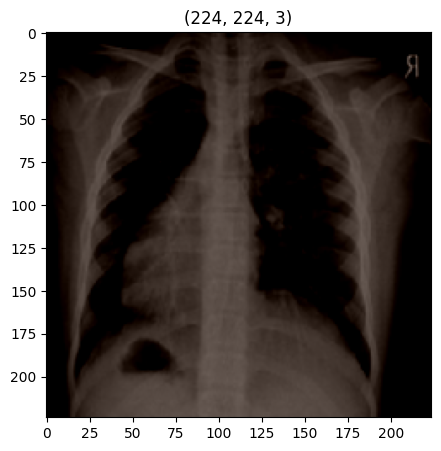

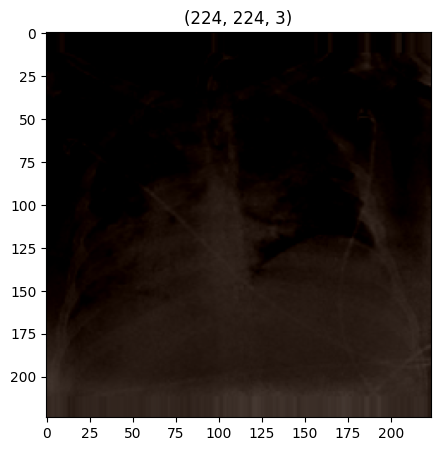

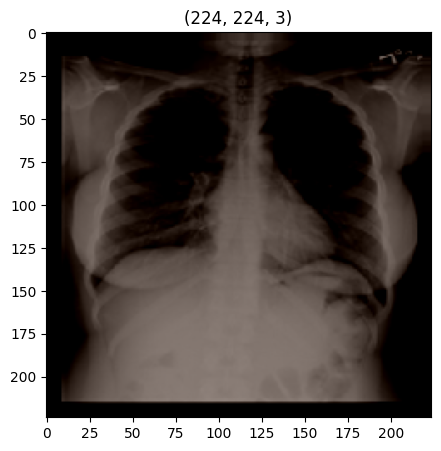

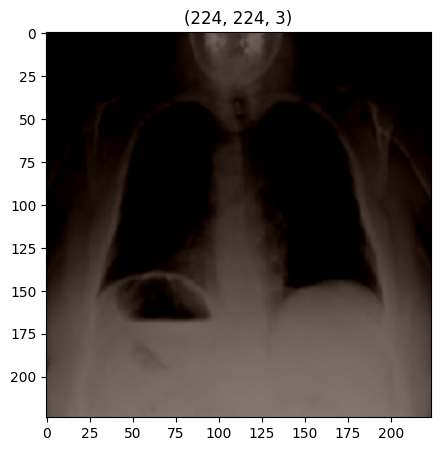

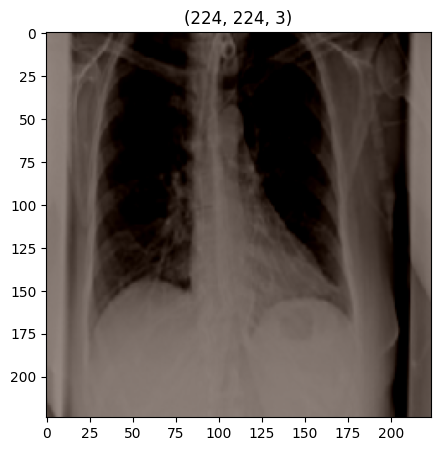

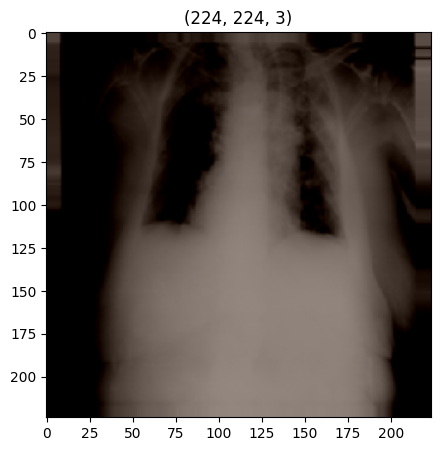

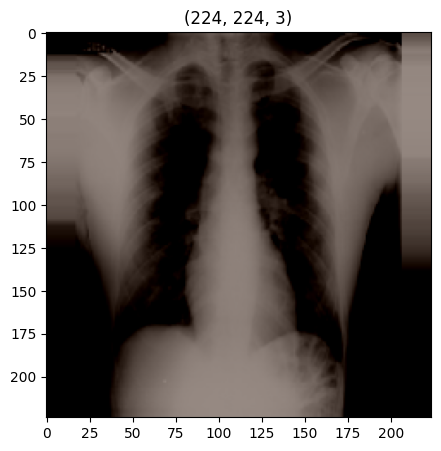

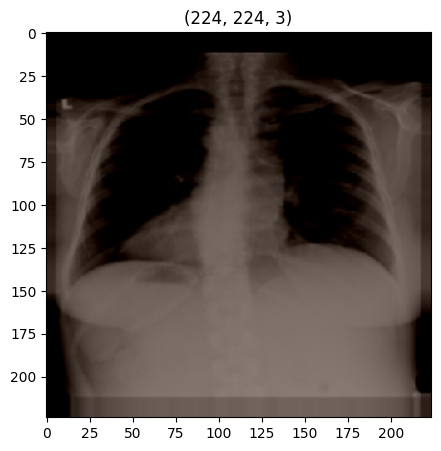

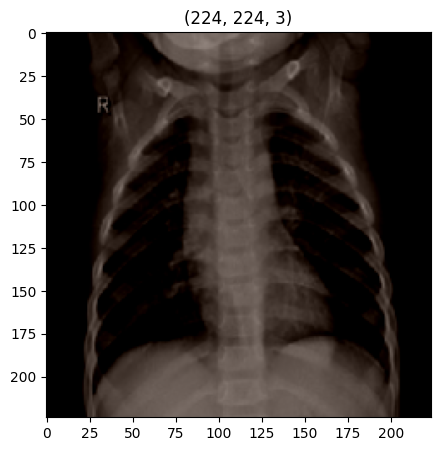

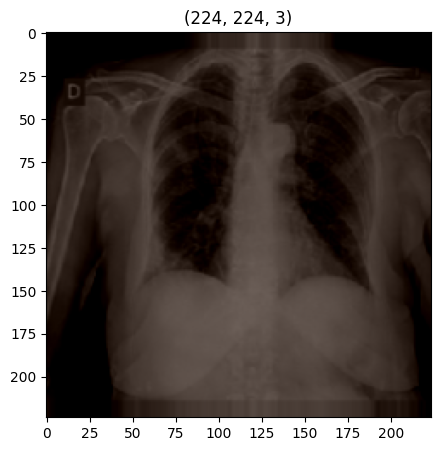

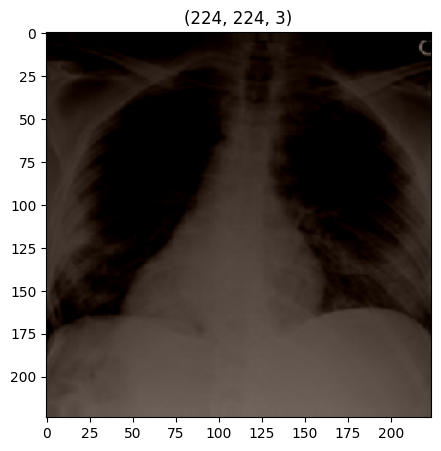

In [21]:


plotImages(t_img, label)

# **VGG16 Model:**

Here, we load the pre trained VGG16 model from keras and  apply the transfer learning technique by trainig the last layer of the model.


In [22]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [23]:
# include_top will consider the new weights and not include the dense layer
vgg = VGG16( input_shape=(224,224,3), include_top= False)

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
# We donot traing the conv layer again
for layer in vgg.layers:
  layer.trainable = False


**Adding the Flatten and Dense layer to finally build the complete model**

In [25]:
f = Flatten()(vgg.output)
f = Dense(units=2 , activation='sigmoid', name = 'predictions' )(f)

model = Model(vgg.input, f)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The model has more than 14 million parameters from which around 50 thousand parameters are trainable.

## **Compile the model**

In [27]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [28]:
# implementing early stopping and model check point in order to stop early if the model is overfitting and save the best model

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

# **Fitting the model with the tuned parameters**

In [29]:
#we run the model for 30 epochs with  15 steps per epoch and 15 validation steps also including the early stopping and model check point defined above
hist = model.fit_generator(train, steps_per_epoch= 15, epochs= 30, validation_data= valid , validation_steps=15, callbacks=[es,mc])

Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 0.5531 - accuracy: 0.7521 
Epoch 1: val_accuracy improved from -inf to 0.64583, saving model to bestmodel.h5
15/15 [==============================] - 440s 29s/step - loss: 0.5531 - accuracy: 0.7521 - val_loss: 0.7387 - val_accuracy: 0.6458
Epoch 2/30
15/15 [==============================] - ETA: 0s - loss: 0.3428 - accuracy: 0.8479 
Epoch 2: val_accuracy did not improve from 0.64583
15/15 [==============================] - 402s 27s/step - loss: 0.3428 - accuracy: 0.8479 - val_loss: 0.9375 - val_accuracy: 0.5854
Epoch 3/30
15/15 [==============================] - ETA: 0s - loss: 0.3322 - accuracy: 0.8729 
Epoch 3: val_accuracy improved from 0.64583 to 0.70625, saving model to bestmodel.h5
15/15 [==============================] - 404s 28s/step - loss: 0.3322 - accuracy: 0.8729 - val_loss: 0.6297 - val_accuracy: 0.7063
Epoch 4/30
15/15 [==============================] - ETA: 0s - loss: 0.2781 - accuracy: 0.8750 
Epoch 4: 

### **Loading the best model and plotting the accuracy and loss of the model**

In [30]:
## load only the best model
from keras.models import load_model
model = load_model("bestmodel.h5")


In [31]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

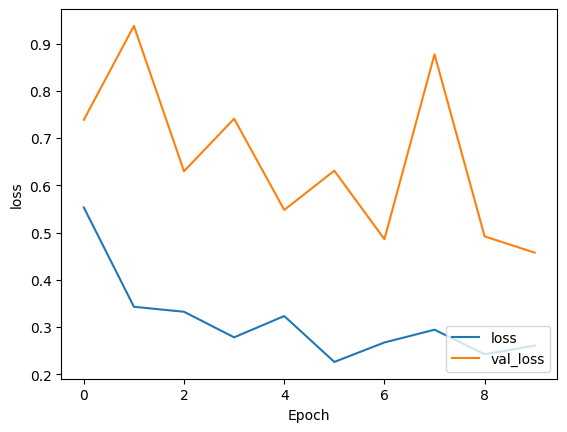

In [32]:
plt.plot(h['loss'], label ='loss')
plt.plot(h['val_loss'], label ='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

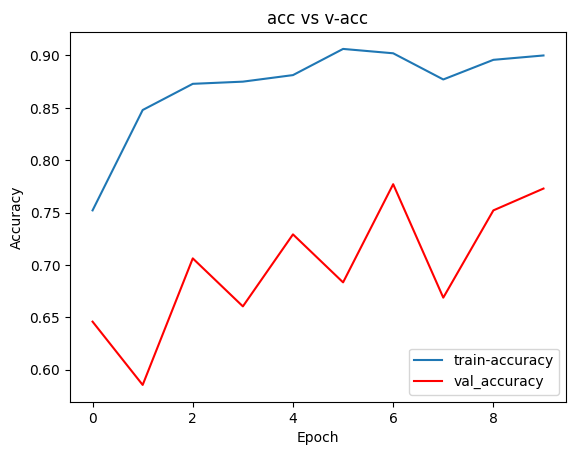

In [48]:
plt.plot(h['accuracy'],label = "train-accuracy")
plt.plot(h['val_accuracy'] ,label="val_accuracy", c = "red")
plt.title("acc vs v-acc")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### **overall accuracy of the model:**

In [35]:
acc = model.evaluate_generator(generator= test)[1]

print(f"The accuracy of your model is = {acc} %")


The accuracy of your model is = 0.7962499856948853 %


In [36]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test.classes, y_pred)

25/25 [==============================] - 321s 13s/step


<Axes: >

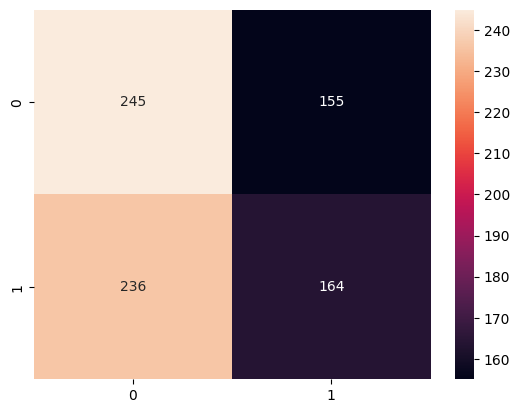

In [37]:
import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

# Prediction:

**Create function get_image_array to plot the image to predict:**

Taking an image as input and returning the preprocessed image after converting image into numpy array and dividing by 255 to normalize the image to a range of 0 and 1 for neural network as well as adding a dimension at beginning to match the expected input shape for neural network

In [38]:
import keras.utils as image

def get_image_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )

  return img

**Predict the random image from the test set:**

1/1 [==============================] - 1s 505ms/step
The given X-Ray image is of the class Covid

1/1 [==============================] - 0s 389ms/step
The image chance of being Covid is : 93.76554489135742 percent

1/1 [==============================] - 0s 380ms/step
The image chance of being Normal is : 20.411673188209534 percent


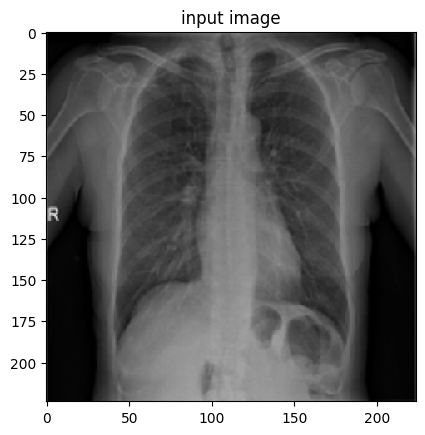

In [39]:
#predict the class of the input image , np.argmax returns the index of the max value
import keras.utils as image

path = "/content/drive/MyDrive/all_images/test/covid/COVID-2542.png"
img = get_image_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of the class {res}")
print()
print(f"The image chance of being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The image chance of being Normal is : {model.predict(img)[0][1]*100} percent")

#Display the input image
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

# **GRAD CAM:**

We have used GRAD CAM to generate the heat map of the image to be predicted by the model in which the  grad cam function defined will generate the heatmap image as well as visualize the spots in the imaage which is considered to be effected by the covid.

In [40]:

import tensorflow as tf

In [41]:
#Function to generate the heatmap


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # This grad_model will map the input image to the activations of the last convulutional layer as well as the prediction output/.
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Gradient of the top predicted class for our input image with respect to the activations of the last conv layer is computed
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    #gradient of the output neuron (top predicted or chosen) with regard to the output feature map of the last convulutional layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [42]:

import matplotlib.cm as cm

from IPython.display import Image, display
from keras.utils import load_img, img_to_array,array_to_img

In [43]:
 #Function to display the spots in the input image which are effected by covid

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):


    # Load the original image
    img = keras.utils.load_img(img_path)
    img = img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))



In [46]:
# function that is used to predict the image type and the ares  are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """



  img_array = get_image_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_image_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()


### **Prediction and Heatmap:**

1/1 [==============================] - 0s 376ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 1s 528ms/step
The chances of image being Covid is : 96.86689972877502 %
1/1 [==============================] - 1s 545ms/step
The chances of image being Normal is : 5.9158749878406525 %

image with heatmap representing the covid spot


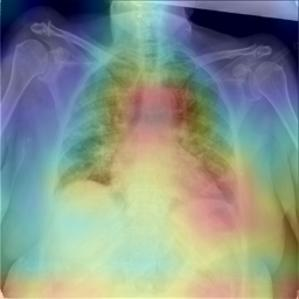


the original input image



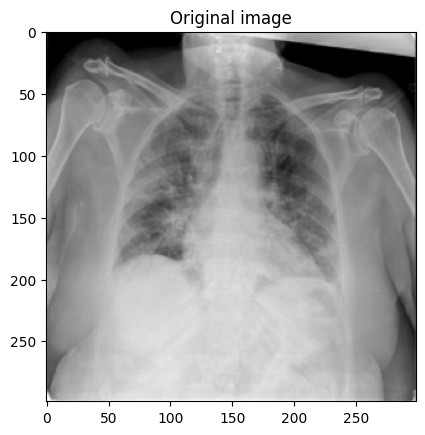

In [47]:
# We provide the random image path form the test data and predict and plot the grad cam visualization to detect the covid spots

# for covid image :
path = "/content/drive/MyDrive/all_images/test/covid/COVID-2501.png"

image_prediction_and_visualization(path)


## **MODEL 2: ResNet50**

In [49]:
!pip install keras.applications


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.3 MB/s eta 0:00:00


In [50]:
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
import keras

In [51]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [52]:
train_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input,
                                    zoom_range= 0.2,
                                    horizontal_flip= True,
                                    shear_range= 0.2,

                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           target_size=(224,224))

Found 6822 images belonging to 2 classes.


In [53]:

validation_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input  )

valid = validation_data_gen.flow_from_directory(directory= valid_path,
                                                target_size=(224,224))

Found 800 images belonging to 2 classes.


In [54]:

test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          target_size=(224,224),
                                          shuffle= False)

Found 800 images belonging to 2 classes.


In [55]:

# Covid +ve X-Ray is represented by 0 and Normal is represented by 1

class_type = {0:'Covid',  1 : 'Normal'}


In [56]:

# to visualize the images in the traing data denerator
t_img , label = train.next()

In [57]:
# function when called will prot the images

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

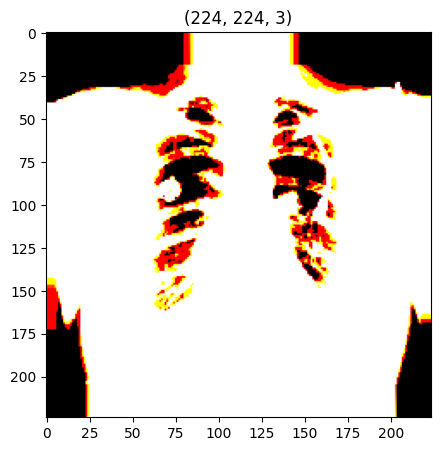

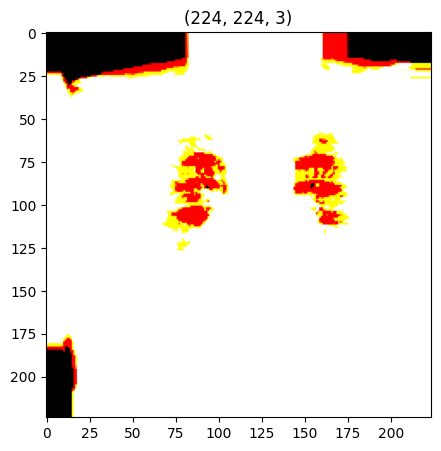

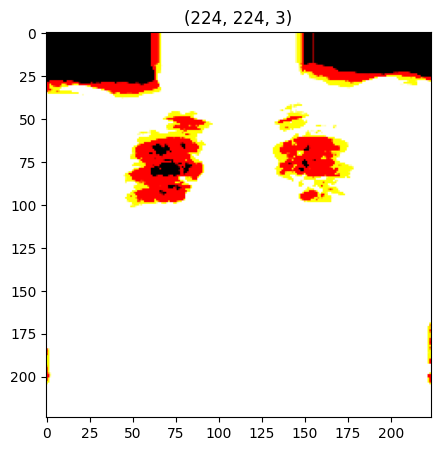

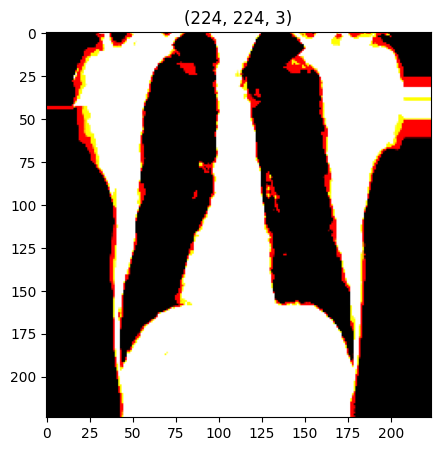

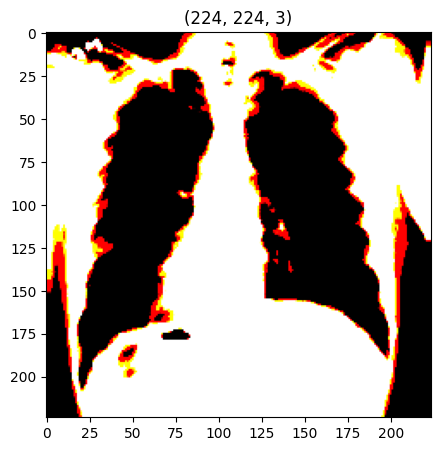

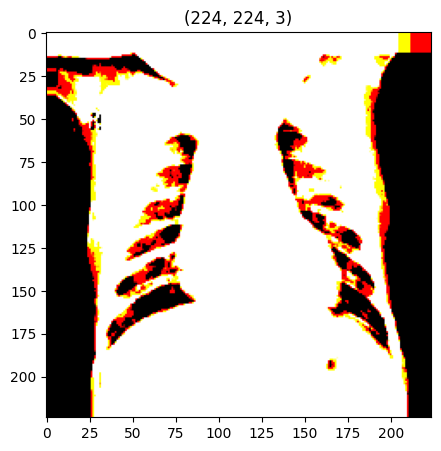

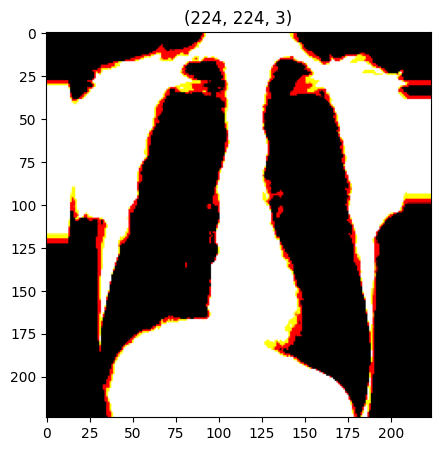

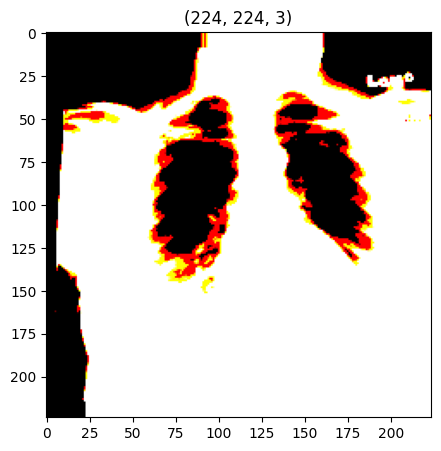

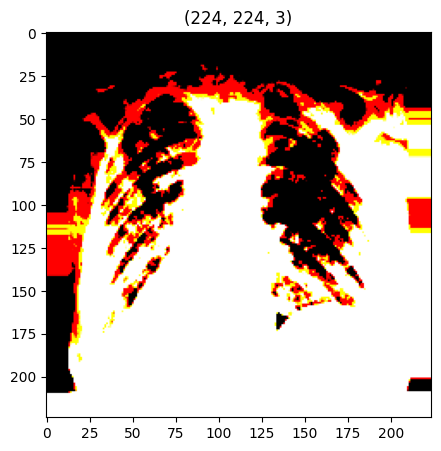

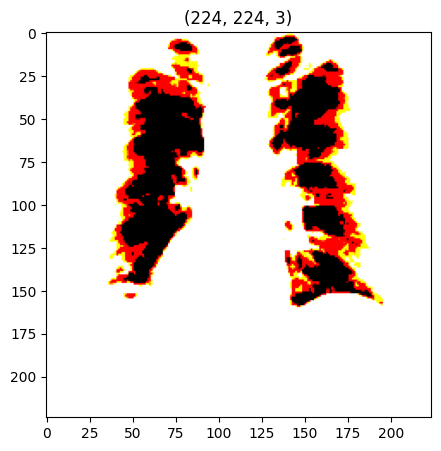

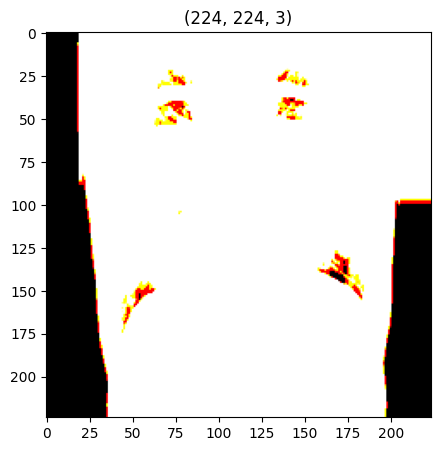

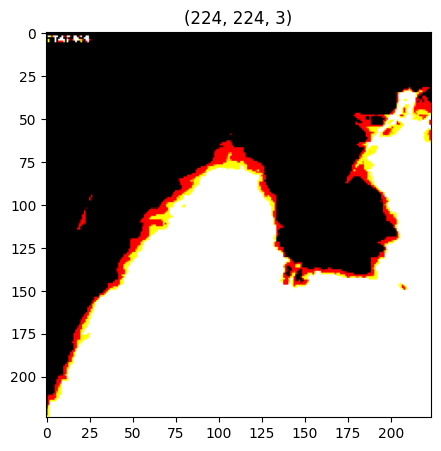

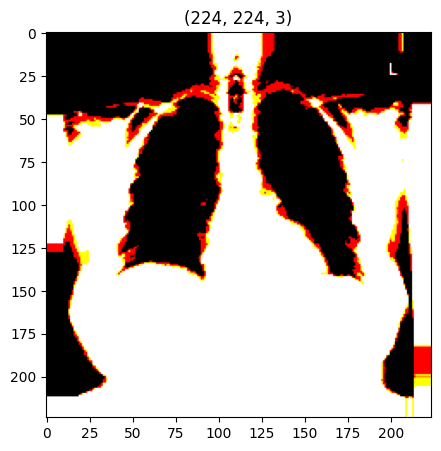

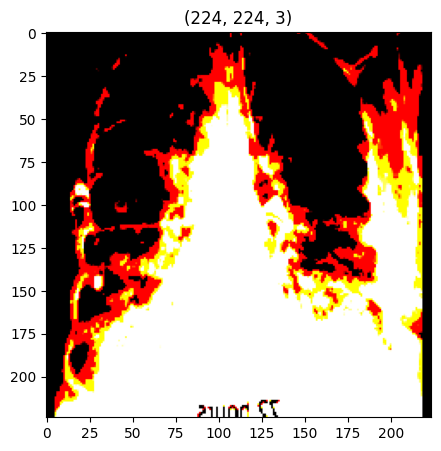

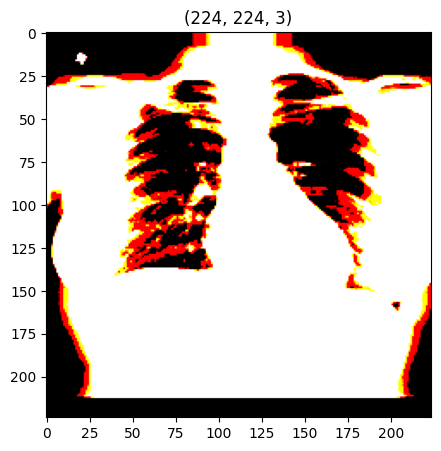

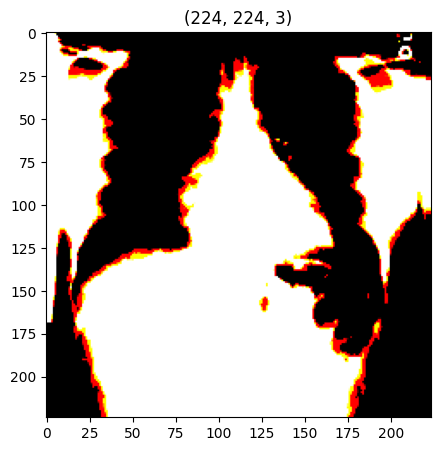

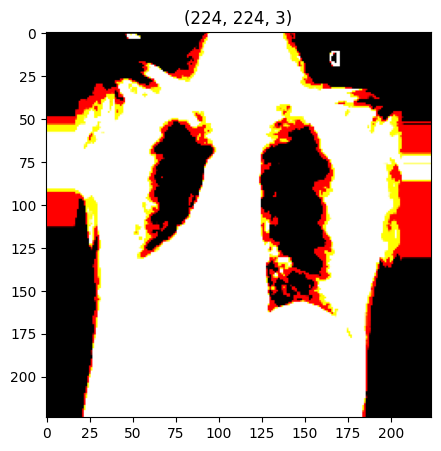

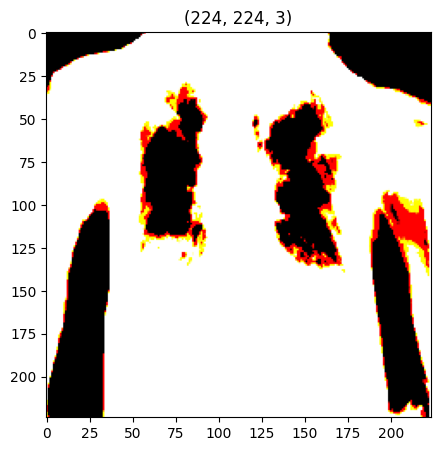

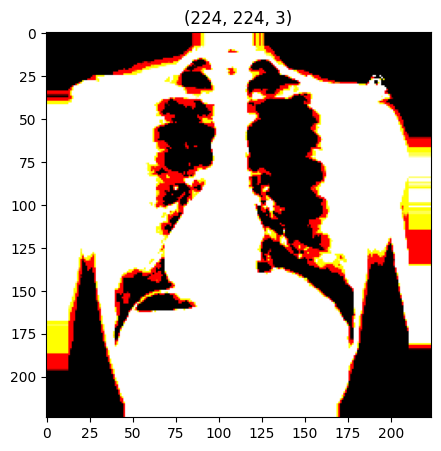

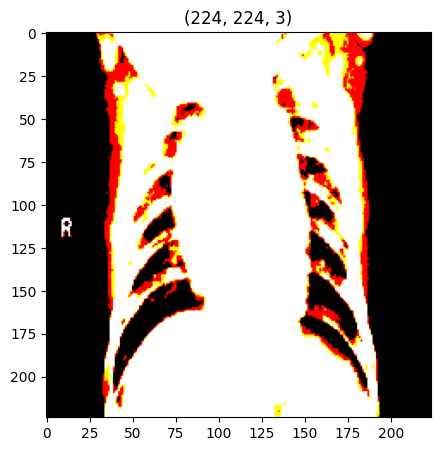

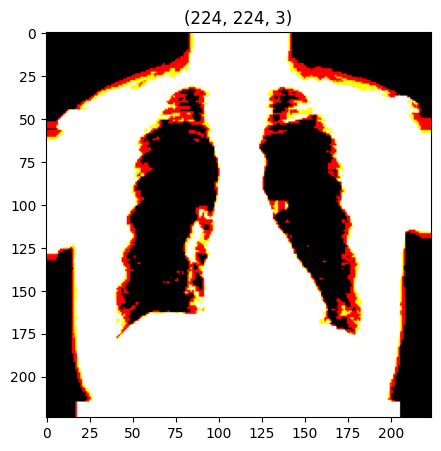

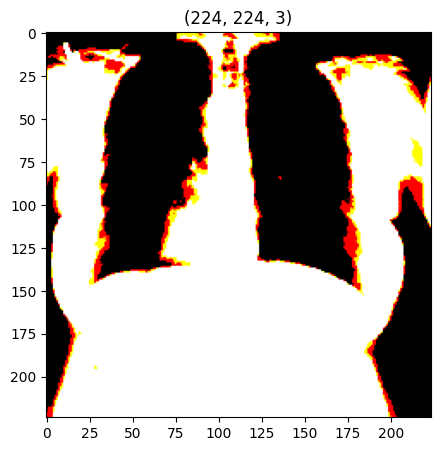

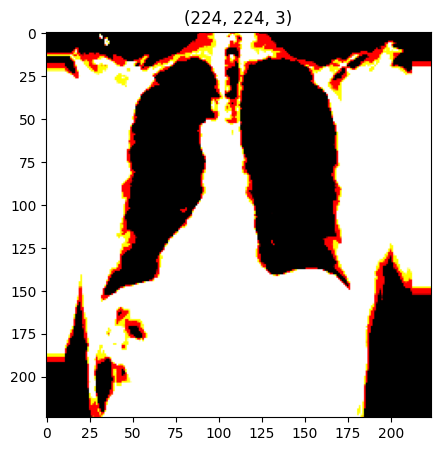

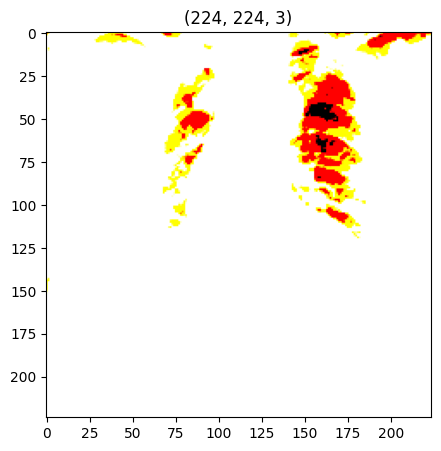

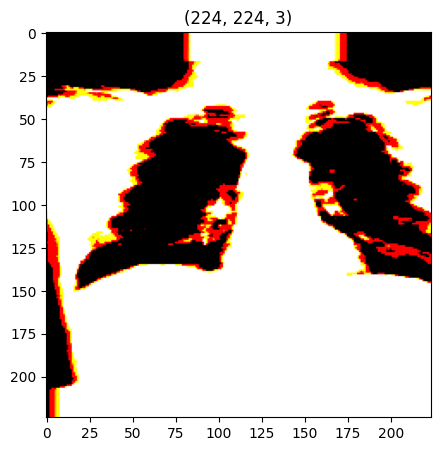

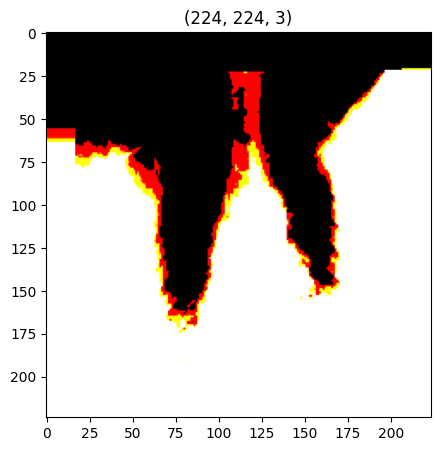

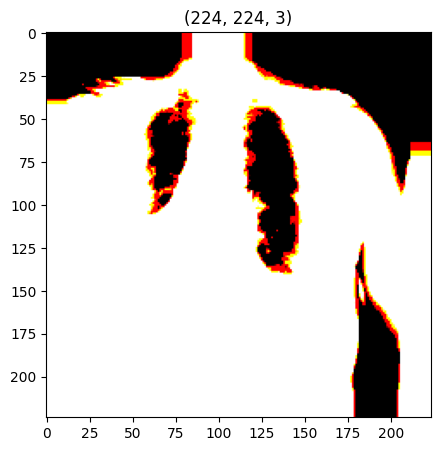

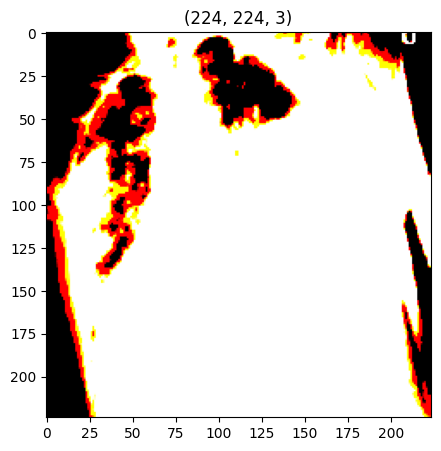

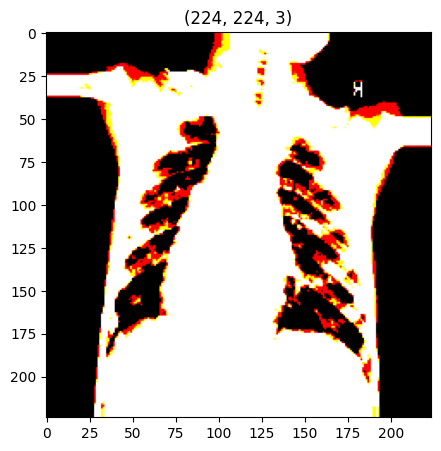

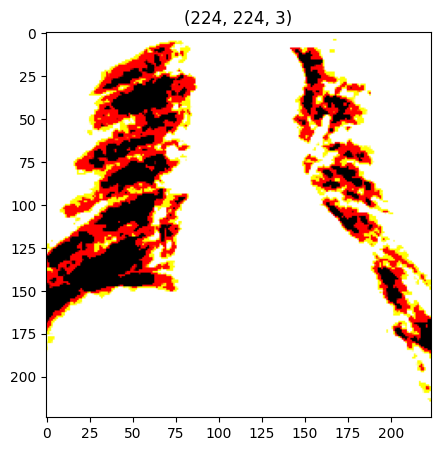

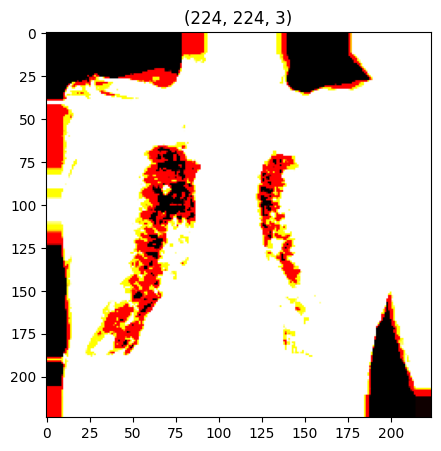

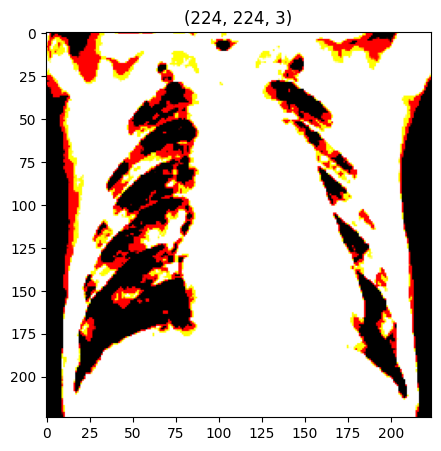

In [58]:
# function call to plot the images

plotImages(t_img, label)

# **Model Building:**

In [59]:

from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [60]:
res = ResNet50( input_shape=(224,224,3), include_top= False) # include_top false

94765736/94765736 [==============================] - 1s 0us/step


In [61]:

for layer in res.layers:
  layer.trainable = False

In [62]:
x = Flatten()(res.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model_res = Model(res.input, x)

In [63]:
model_res.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [64]:
model_res.compile( optimizer= 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [66]:
# implementing early stopping and model check point

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es_res = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc_res = ModelCheckpoint(filepath="bestmodelRes.h5", monitor="val_accuracy", verbose=1, save_best_only= True)



## **Fit the model with early stopping and ModelCheckpoint**

In [67]:
hist_res = model_res.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= valid , validation_steps= 15, callbacks=[es_res,mc_res])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 9.9748 - accuracy: 0.6562 
Epoch 1: val_accuracy improved from -inf to 0.55625, saving model to bestmodelRes.h5
10/10 [==============================] - 140s 14s/step - loss: 9.9748 - accuracy: 0.6562 - val_loss: 21.3777 - val_accuracy: 0.5562
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.4967 - accuracy: 0.8188
Epoch 2: val_accuracy improved from 0.55625 to 0.65833, saving model to bestmodelRes.h5
10/10 [==============================] - 107s 11s/step - loss: 5.4967 - accuracy: 0.8188 - val_loss: 10.1713 - val_accuracy: 0.6583
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.9497 - accuracy: 0.8094
Epoch 3: val_accuracy improved from 0.65833 to 0.67292, saving model to bestmodelRes.h5
10/10 [==============================] - 129s 14s/step - loss: 6.9497 - accuracy: 0.8094 - val_loss: 11.0971 - val_accuracy: 0.6729
Epoch 4/30
10/10 [==============================] - ETA: 0s 

In [68]:
## load only the best model
from keras.models import load_model
model = load_model("bestmodelRes.h5")

In [69]:
h = hist_res.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

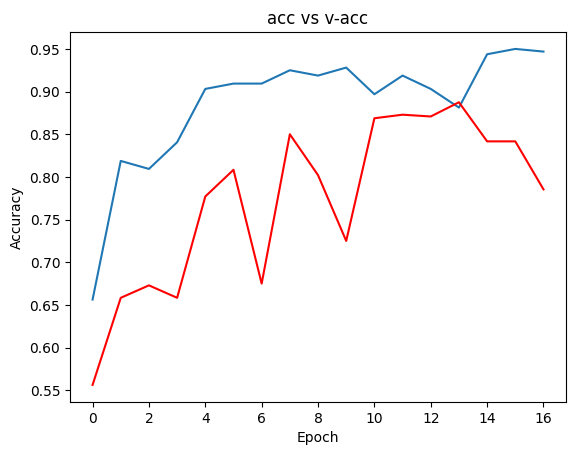

In [72]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.legend(loc='lower right')
plt.title("acc vs v-acc")
plt.show()

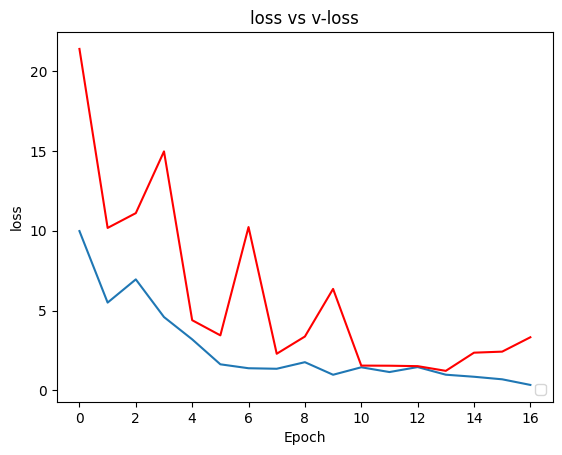

In [73]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.title("loss vs v-loss")
plt.show()

# **Overall Accuracy and Confusion matrix:**

In [74]:
# checking out the accurscy of our model

acc = model.evaluate_generator(generator= test)[1]

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.8475000262260437 %


In [96]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test.classes, y_pred)

25/25 [==============================] - 111s 4s/step


<Axes: >

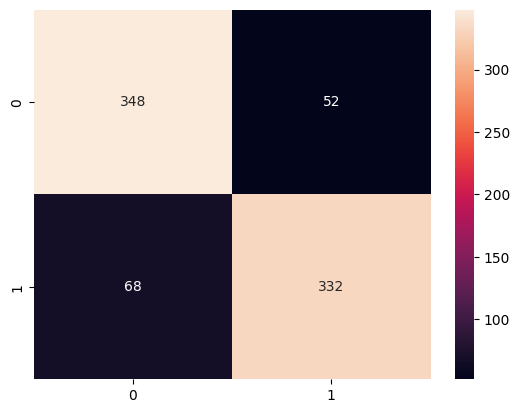

In [97]:

import seaborn as sns
sns.heatmap(cm, annot=True,fmt='d')

In [77]:

import keras.utils as image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

# **Prediction:**

1/1 [==============================] - 0s 190ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 210ms/step
The chances of image being Covid is : 99.99998211860657 percent

1/1 [==============================] - 0s 201ms/step
The chances of image being Normal is : 5.193913210632672e-06 percent


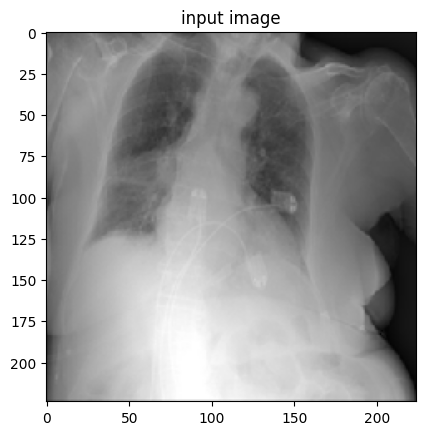

In [78]:
# path for that new image. ( you can take it either from google or any other scource)

path = "/content/drive/MyDrive/all_images/test/covid/COVID-2615.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")


# to display the image
plt.imshow(img[0]/255, cmap = "gray")
plt.title("input image")
plt.show()

In [79]:
import tensorflow as tf

In [85]:
# this function is udes to generate the heat map of aan image
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [86]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [87]:
from keras.utils import load_img, img_to_array,array_to_img

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded
    """

    # Load the original image
    img = load_img(img_path)
    img = img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))



In [88]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "conv5_block3_3_conv", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """

  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()
  print()
  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()


# **Prediction and Heatmap:**

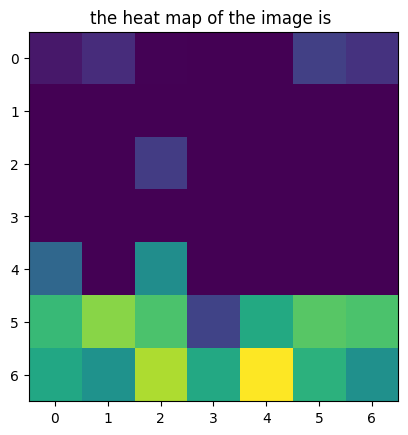


1/1 [==============================] - 0s 201ms/step
The given X-Ray image is of type = Covid

1/1 [==============================] - 0s 184ms/step
The chances of image being Covid is : 97.85407185554504 %
1/1 [==============================] - 0s 205ms/step
The chances of image being Normal is : 0.23196307010948658 %

image with heatmap representing region on interest


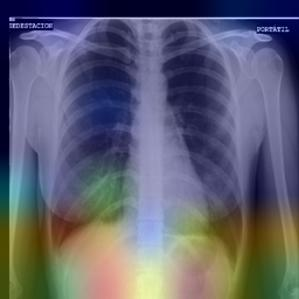


the original input image



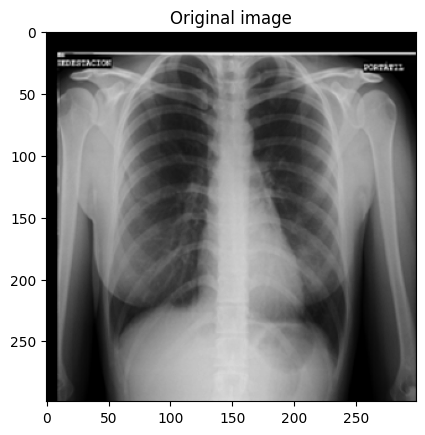

In [90]:
#predictions
#Provid teh random images from the test dataset

# for covid image :  path:- provide any image from google or provide image from all image folder
path = "/content/drive/MyDrive/final_images_model/test/COVID/COVID-2955.png"

image_prediction_and_visualization(path)

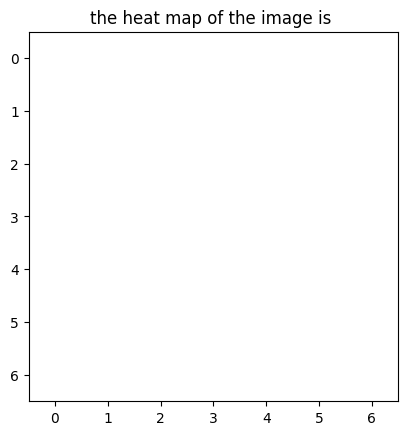


1/1 [==============================] - 0s 187ms/step
The given X-Ray image is of type = Normal

1/1 [==============================] - 0s 341ms/step
The chances of image being Covid is : 1.0759568930263086e-08 %
1/1 [==============================] - 0s 342ms/step
The chances of image being Normal is : 100.0 %

image with heatmap representing region on interest


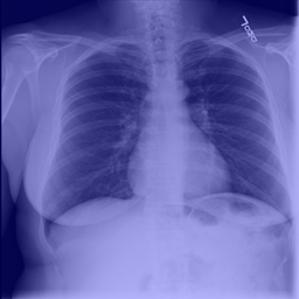


the original input image



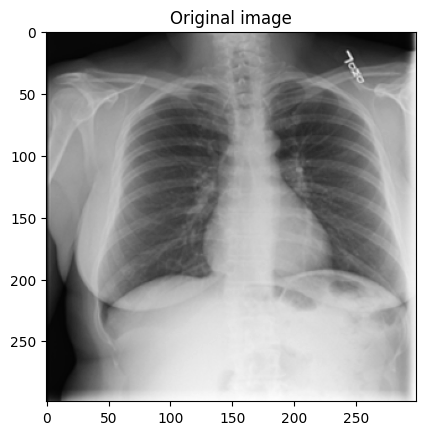

In [93]:
# for normal image :  provide any random images path from the test dataset
path = "/content/drive/MyDrive/final_images_model/test/Normal/Normal-4052.png"

image_prediction_and_visualization(path)

# for a healthey chest x-Ray heap map will be white thus the x-ray will look blue


# **Conclusion:**


In [ ]:
Hence, ResNet50 is the model for detecting COVID-19 using X-Ray images as this model has the highest accuracy, validation accuracy and predicting the test data with high reliability than that of the VGG16 model.